Import Libraries

In [28]:
from google.colab import drive
from google.colab import files
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.fftpack import idct
from scipy.fftpack import dct

Read the bmp file

In [29]:
file_path = '/content/lena_colored_256.bmp'

try:
    image = Image.open(file_path)

    width, height = image.size
    print(f"Image dimensions: {width}x{height}")

except FileNotFoundError:
    print("Image file not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


pixel_data = list(image.getdata())
# print(pixel_data)
width, height = image.size
pixel_array = np.array([pixel_data[i:i+width] for i in range(0, len(pixel_data), width)])

Image dimensions: 256x256


Visualization

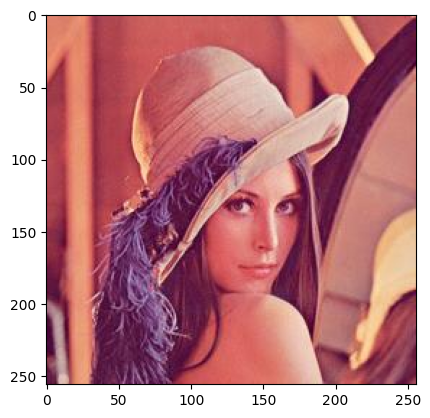

In [30]:
# print(pixel_array.shape)
plt.imshow(pixel_array, cmap='gray')

In [31]:
print(pixel_array[32])

[[233 142 111]
 [237 147 113]
 [241 148 115]
 [237 144 111]
 [235 140 110]
 [233 135 108]
 [225 124 104]
 [218 114 101]
 [207  98  93]
 [200  90  91]
 [182  69  75]
 [162  48  56]
 [164  49  56]
 [187  72  77]
 [210  95 100]
 [219 107 103]
 [226 120 104]
 [231 131 107]
 [237 139 112]
 [235 140 110]
 [234 141 110]
 [233 143 109]
 [232 142 107]
 [228 138 103]
 [229 138 107]
 [233 139 111]
 [234 135 112]
 [230 127 110]
 [226 118 106]
 [218 107 100]
 [203  88  85]
 [186  73  77]
 [166  59  75]
 [145  43  64]
 [143  41  62]
 [151  49  70]
 [151  48  67]
 [153  50  69]
 [161  58  77]
 [163  60  77]
 [163  58  73]
 [163  58  72]
 [166  60  74]
 [167  61  73]
 [169  63  75]
 [170  64  76]
 [171  65  77]
 [172  66  78]
 [175  67  80]
 [175  68  78]
 [175  67  80]
 [179  69  80]
 [180  70  81]
 [182  72  81]
 [184  74  83]
 [186  75  82]
 [190  79  86]
 [191  80  86]
 [194  81  87]
 [194  81  85]
 [193  80  84]
 [194  81  83]
 [196  83  85]
 [199  84  87]
 [205  89  92]
 [205  86  90]
 [204  85 

Color Space Transformation(RGB to YCbCr)

In [32]:
rgb_to_ycbcr = np.array([[0.299, 0.587, 0.114],
                        [-0.168736, -0.331264, 0.5],
                        [0.5, -0.418688, -0.081312]])

M = [[0.2126*(219/255) , 0.7152*(219/255) , 0.0722*(219/255)],
     [-(0.2126/1.18556)*(224/255) , (0.7152/1.8556)*(224/255) , 0.5*(219/255)],
     [0.5*(224/255) , (0.7152/1.5748)*(224/255) , (0.0722/1.5748)*(224/255)]]

K = [[16], [128], [128]]

# # Apply the color transformation
# pixel_array2 = np.dot(pixel_array, rgb_to_ycbcr)
pixel_array2 = np.zeros_like(pixel_array,dtype='float')

for row in range(len(pixel_array)):
  for col in range(len(pixel_array[row])):
    r,g,b = pixel_array[row,col]
    col1 = [[r],[g],[b]]
    res = np.dot(M,col1) + K
    pixel_array2[row,col] = res.T

In [33]:
print(pixel_array2[0])

[[146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [146.94671294 187.42239029 285.83193932]
 [145.22906588 186.20147146 284.07507657]
 [144.37024235 185.59101204 283.1966452 ]
 [142.65259529 184.3700932  281.43978246]
 [141.79377176 183.75963379 280.56135108]
 [140.93494824 183.14917437 279.68291971]
 [140.07612471 182.53871495 278.80448834]
 [140.07612471 182.53871495 278.80448834]
 [140.44232706 181.15963985 279.04233641]
 [141.54677412 180.97796022 279.75967368]
 [143.63062353 180.81980395 281.7543845 ]
 [146.08995059 184.68387787 283.67234134]
 [147.80759765 185.90479671 285.42920408]
 [149.09703529 188.07537888 286.90794524]
 [152.16372235 189.38650556 289.86163447]
 [155.34995765 191.17472268 293.85484917]
 [159.21346118 192.66689701 297.64

Dividing into blocks of 8x8

In [34]:
num_blocks_h = height // 8
num_blocks_w = width // 8

# Reshape the image into 32x32 blocks with (8, 8, 3) pixels in each block
blocks = pixel_array2[:num_blocks_h * 8, :num_blocks_w * 8].reshape(num_blocks_h, 8, num_blocks_w, 8, 3).transpose(0, 2, 1, 3, 4).reshape(-1, 8, 8, 3)


In [35]:
print(blocks.shape)
print(blocks[1,:,:,0])

(1024, 8, 8, 3)
[[145.22906588 144.37024235 142.65259529 141.79377176 140.93494824
  140.07612471 140.07612471 140.44232706]
 [142.65259529 141.79377176 140.93494824 140.93494824 140.93494824
  140.93494824 140.93494824 142.15997412]
 [140.56634118 140.56634118 140.56634118 139.70751765 140.56634118
  141.42516471 142.28398824 142.15997412]
 [140.56634118 140.56634118 139.70751765 139.70751765 139.70751765
  140.56634118 140.56634118 141.30115059]
 [143.14281176 142.28398824 141.42516471 139.70751765 139.70751765
  138.84869412 138.84869412 138.72468   ]
 [144.86045882 144.00163529 142.28398824 140.56634118 139.70751765
  138.84869412 138.84869412 138.72468   ]
 [143.87762118 143.01879765 142.15997412 141.30115059 140.44232706
  140.44232706 141.30115059 141.17713647]
 [142.15997412 142.15997412 141.30115059 141.30115059 141.30115059
  142.15997412 143.01879765 143.75360706]]


In [36]:
def apply_dct2(block):
  return dct(dct(block, axis=0, norm='ortho'), axis=1, norm='ortho')

def apply_idct2(block):
  return idct(idct(block, axis=0, norm='ortho'), axis=1, norm='ortho')

In [37]:
def apply_dct(block):
  n = block.shape[0]
  dct_result = np.zeros((n, n), dtype=float)

  for u in range(n):
      for v in range(n):
          alpha_u = 1.0 if u == 0 else np.sqrt(2) / 2.0
          alpha_v = 1.0 if v == 0 else np.sqrt(2) / 2.0

          sum_val = 0.0
          for x in range(n):
              for y in range(n):
                  sum_val += block[x, y] * np.cos((2 * x + 1) * u * np.pi / (2 * n)) * np.cos((2 * y + 1) * v * np.pi / (2 * n))

          dct_result[u, v] = alpha_u * alpha_v * sum_val

  return dct_result

In [38]:
# Create an array to store the DCT coefficients
dct_blocks = np.empty_like(blocks, dtype=float)

# Iterate through each block and apply manual DCT
for i in range(len(blocks)):
    for c in range(3):  # Loop over the color channels (yc, bc, r)
        dct_blocks[i, :, :, c] = apply_dct2(blocks[i, :, :, c])

In [39]:
print(dct_blocks.shape)
print(dct_blocks[1,:,:,1])

(1024, 8, 8, 3)
[[ 1.45913643e+03  5.09854561e+00  1.89543738e+00  1.29990485e+00
  -9.12578996e-01  5.77500211e-01 -6.16560361e-01  3.27291152e-01]
 [ 3.47362423e+00  7.25958551e-02 -6.32630505e-01  4.78543308e-01
  -1.28129564e-03 -2.97326292e-03 -3.29202324e-02  4.01756201e-02]
 [ 3.60391163e+00  6.72827806e-02  8.11801239e-02  5.06292781e-02
   1.44727141e-01  2.73646846e-01 -2.71603801e-01 -1.89924035e-01]
 [ 1.27233609e+00  5.89916538e+00  4.07664447e-02  1.75127556e-01
   2.00777827e-01  9.30900162e-02 -1.77355851e-01  2.23198429e-01]
 [-2.28922282e-01 -7.60677610e-02 -9.97004584e-02 -4.93977171e-03
   7.63074273e-02 -1.86848975e-01 -4.12972820e-02 -1.70735575e-01]
 [-7.30239074e-01 -1.53377970e-01  1.29429028e-01 -1.51493193e-01
  -1.54728539e-01  1.68196692e-01 -7.61770066e-02 -1.58805027e-01]
 [ 2.41696771e-01  2.48707577e-01  1.63688802e-01 -6.12001412e-02
  -3.07731637e-01 -1.40228265e-01 -5.86281632e-02  1.33683700e-01]
 [-6.48840476e-01  1.00822120e-01 -3.92057361e-02 -4.

Quantization

In [40]:
quantization_matrix_y = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

quantization_matrix_cbcr = np.array([
    [17, 18, 24, 47, 99, 99, 99, 99],
    [18, 21, 26, 66, 99, 99, 99, 99],
    [24, 26, 56, 99, 99, 99, 99, 99],
    [47, 66, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99],
    [99, 99, 99, 99, 99, 99, 99, 99]
])

# Create an array to store the quantized DCT coefficients
quantized_blocks = np.empty_like(dct_blocks, dtype=int)

# Iterate through each block and perform quantization for each channel
for i in range(len(dct_blocks)):
    for c in range(3):  # Loop over the color channels (Y, Cb, Cr)
        if c == 0:  # For Y channel
            quantized_blocks[i, :, :, c] = np.round((dct_blocks[i, :, :, c]) / quantization_matrix_y)
        else:  # For Cb and Cr channels
            quantized_blocks[i, :, :, c] = np.round(dct_blocks[i, :, :, c] / quantization_matrix_cbcr)


In [41]:
print(quantized_blocks[1,:,:,1])

[[86  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


Zig-Zag Scanning

In [42]:
def zigzag_scan(matrix):
    # print(matrix.shape)
    h, w = matrix.shape
    result = np.zeros(h*w)
    x, y = 0, 0
    for i in range(h * w):
        result[i] = matrix[x, y]
        if (x + y) % 2 == 0:  # Upward
            if x == 0 and y!=w-1:
                y += 1
            elif y == w - 1:
                x += 1
            else:
                y += 1
                x -= 1
        else:  # Downward
            if y == 0 and x!=h-1:
                x += 1
            elif x == h - 1:
                y += 1
            else:
                y -= 1
                x += 1
    return result

zigzagged_blocks = []

# Iterate through each block and perform zigzag scanning for each channel
for i in range(len(quantized_blocks)):
    zigzagged_block = []
    for c in range(3):  # Loop over the color channels (Y, Cb, Cr)
        zigzagged_block.append(zigzag_scan(quantized_blocks[i, :, :, c]))
    zigzagged_blocks.append(zigzagged_block)


In [43]:
zigzagged_blocks_np = np.array(zigzagged_blocks)
print(zigzagged_blocks_np.shape)

(1024, 3, 64)


Run Length Encoding

In [44]:
def run_length_encode(channel_data):
    encoded_data = []
    run_length = 1

    for i in range(1, len(channel_data)):
        if channel_data[i] == channel_data[i - 1]:
            run_length += 1
        else:
            encoded_data.append((channel_data[i - 1], run_length))
            run_length = 1

    encoded_data.append((channel_data[-1], run_length))
    return encoded_data

# Create an array to store the RLE-encoded data
rle_encoded_blocks = []

# Iterate through each block
for i in range(len(zigzagged_blocks_np)):
    rle_encoded_block = []

    for c in range(3):  # Loop over the color channels (Y, Cb, Cr)
        rle_encoded_channel = run_length_encode(zigzagged_blocks_np[i, c])
        rle_encoded_block.append(rle_encoded_channel)

    rle_encoded_blocks.append(rle_encoded_block)


In [45]:
rle_encoded_blocks_np = np.array(rle_encoded_blocks)
print(rle_encoded_blocks_np[0][0])

[(72.0, 1), (0.0, 1), (1.0, 1), (0.0, 61)]


<ipython-input-45-cac790e046b2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rle_encoded_blocks_np = np.array(rle_encoded_blocks)


Huffman Coding

In [46]:
import heapq
from collections import defaultdict

In [47]:
frequency_count = defaultdict(int)
for block in rle_encoded_blocks:
    for channel_data in block:
        for symbol, run_length in channel_data:
            frequency_count[(symbol, run_length)] += 1

# Step 2: Building Huffman Tree
heap = [[weight, [symbol, ""]] for symbol, weight in frequency_count.items()]
heapq.heapify(heap)

while len(heap) > 1:
    lo = heapq.heappop(heap)
    hi = heapq.heappop(heap)
    for pair in lo[1:]:
        pair[1] = '0' + pair[1]
    for pair in hi[1:]:
        pair[1] = '1' + pair[1]
    heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

# Step 3: Huffman Encoding
huffman_codes = dict(heap[0][1:])

# Step 4: Encoding
encoded_blocks = []

for block in rle_encoded_blocks:
    encoded_block = []
    for channel_data in block:
        encoded_channel = []
        for symbol, run_length in channel_data:
            encoded_channel.append(huffman_codes[(symbol, run_length)])
        encoded_data = ''.join(symbol for symbol in encoded_channel)
        encoded_block.append(encoded_data)
    encoded_blocks.append(encoded_block)


In [48]:
print(np.array(encoded_blocks).shape)
print((encoded_blocks[0]))

(1024, 3)
['000101001110011001101', '1101011011110011001101', '00011111011110011001101']


In [49]:
#2 bytes are used to represent the length of each huffman coded binary string

# Step 1: Bitstream Packaging
packaged_data = []
for row in encoded_blocks:
    package = b''  # Use bytes to store the packaged binary data
    for binary_string in row:
        binary_bytes = int(binary_string, 2).to_bytes((len(binary_string) + 7) // 8, byteorder='big')
        byte_count = (len(binary_bytes)).to_bytes(1, byteorder='big')  # Use 1 byte for the byte count
        leading_zero_count = (8 - (len(binary_string) % 8))%8
        metadata_byte = leading_zero_count.to_bytes(1, byteorder='big')
        package +=  byte_count + metadata_byte + binary_bytes
    packaged_data.append(package)

# Step 5: Decoding
# decoded_data = []
# code = ''
# for bit in encoded_data:
#     code += bit
#     for symbol, huff_code in huffman_codes.items():
#         if code == huff_code:
#             decoded_data.append(symbol)
#             code = ''

In [50]:
maxb = 0
tot = 0
for row in packaged_data:
  tot += len(row)
  maxb = max(len(row),maxb)

print(maxb, tot)

55 24048


In [51]:
print((packaged_data[0]))

b'\x03\x03\x02\x9c\xcd\x03\x025\xbc\xcd\x03\x01\x0f\xbc\xcd'


In [52]:
packaged_data2 = []
for byte_array in packaged_data:
    byte_count = len(byte_array).to_bytes(1, byteorder='big')  # Use 1 byte for the byte count
    package = byte_count + byte_array
    packaged_data2.append(package)

# Step 2: Bitstream Concatenation
bitstream = b''.join(packaged_data2)

In [53]:
print((bitstream))

b'\x0f\x03\x03\x02\x9c\xcd\x03\x025\xbc\xcd\x03\x01\x0f\xbc\xcd\x0c\x02\x02\x07\x14\x02\x02\x01\xd4\x02\x00\xaa\x14\x11\x04\x04\x00#\xe6-\x03\x04\x0c\x11x\x04\x03\x1a\xa1f-\x14\x05\x01/\xab\'\x9b4\x04\x00\\$\xf34\x05\x05\x02\xaa\t\xe4\xb4\x12\x05\x02\x11\xd2y\xfb\xf7\x03\x04\x00(\xcd\x04\x04\x0bx\xa8\xf4\x0c\x02\x00^\xd4\x02\x02\x00\x94\x02\x00\x1f\x14\x11\x04\x03\x1e\xbc\xa8\xf4\x03\x05\x06\x02x\x04\x03\x1e\xcc\xa8\xf4\x0e\x03\x04\x04\x0ex\x02\x01U\xd4\x03\x04\n\x82x\r\x03\x01*\x1c\xcd\x02\x01j\x14\x02\x00\xc0\xd4\x0c\x02\x00AT\x02\x01jT\x02\x00\xc0\xd4\x0c\x02\x00AT\x02\x01jT\x02\x00\xb7\xd4\x0c\x02\x00AT\x02\x01jT\x02\x00\xb7\xd4\r\x03\x01 \xbc\xcd\x02\x01jT\x02\x00\xb7\xd4\x0f\x04\x04\x05A\xe5\xad\x03\x05\x06\xa5\xf8\x02\x00\xc0\xd4\x0c\x02\x00T\x14\x02\x01jT\x02\x00\xb7\xd4\x0c\x02\x00AT\x02\x01jT\x02\x00\xb7\xd4\x0c\x02\x00AT\x02\x01jT\x02\x00\xc0\xd4\x0c\x02\x00T\x14\x02\x01j\x14\x02\x00\xc0\xd4\x0c\x02\x00\xb6T\x02\x01j\x14\x02\x00\xc3\xd4\x11\x05\x07\x01\xec\x0334\x03\x05\x05]

In [54]:
compression_parameters = {
    'quantization_matrix_y': quantization_matrix_y,  # Your quantization matrices
    'quantization_matrix_cbcr': quantization_matrix_cbcr,
    'image_dimensions': (256, 256),  # Your image dimensions
    'num_blocks': len(encoded_blocks),  # Number of 8x8 blocks
    'color_channels': 3,  # Number of color channels (Y, Cb, Cr)
    'huffman_table': huffman_codes
}

# Step 3: Storage or Transmission

# Saving to a binary file
import pickle

header_and_metadata = pickle.dumps(compression_parameters)
compressed_bitstream = header_and_metadata + b'\x00\xFF'  # Insert a marker to separate header from data
compressed_bitstream += bitstream

#How to select the marker?

with open('compressed_image.jpg', 'wb') as file:
    file.write(compressed_bitstream)